In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
%matplotlib inline

In [4]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

# 1. Data Inspection:

In [7]:
# Checking racist/sexist tweets
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [8]:
# it is an imbalanced classification challenge:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

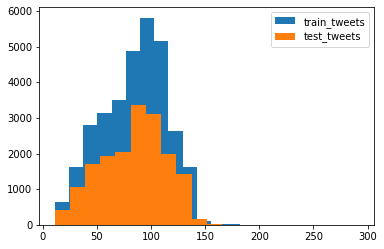

In [11]:
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

# 2. Data Cleaning:

In [6]:
# Combining Train and Test data for cleaning purpose:
combi = train.append(test, ignore_index=True) 
combi.shape

(49159, 3)

In [7]:
# A function to remove some pattern:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [8]:
# 1. Removing Twitter Handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# 2. Removing Punctuations, Numbers, and Special Characters:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
# 3. Removing short words (remove words with len less than 3):
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# 4. Text Normalization (Tokenization)

In [11]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [12]:
# 5. Applying Stemming:
from nltk.stem.porter import *
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [13]:
# 6. Adding all tokens to make lines back:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi['tidy_tweet'].head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

# 3. Story Generation and Visualization from Tweets

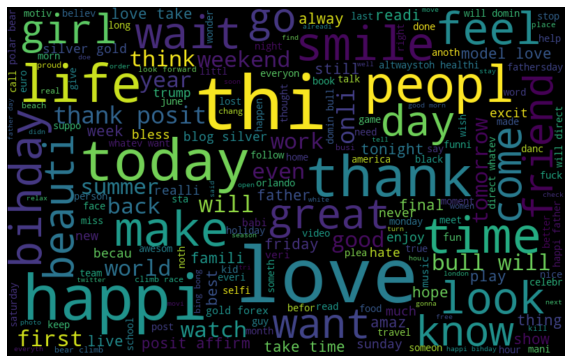

In [58]:
# A) Understanding the common words used in the tweets: WordCloud
from wordcloud import WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

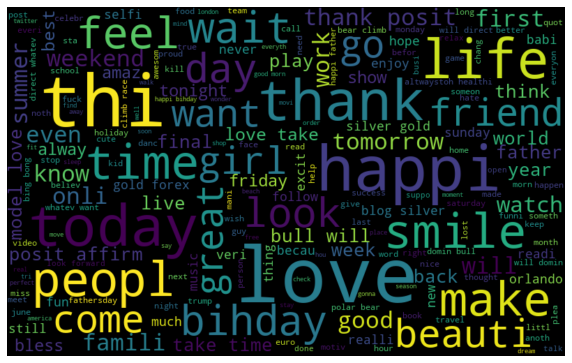

In [66]:
# B) Words in non racist/sexist (Good Tweets:)
tweetsnormal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

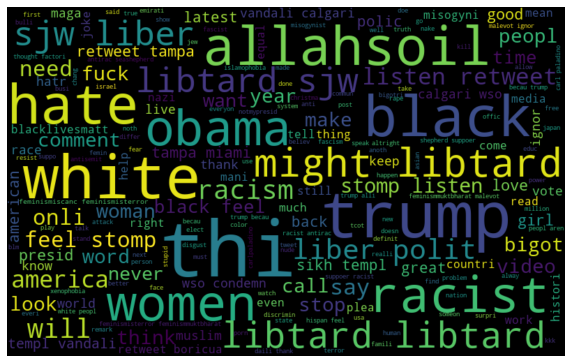

In [68]:
# C) Racist/Sexist Tweets (Non )
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
# D) Understanding the impact of Hashtags on tweets sentiment
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)    
        hashtags.append(ht)  
    return hashtags

In [15]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [16]:
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

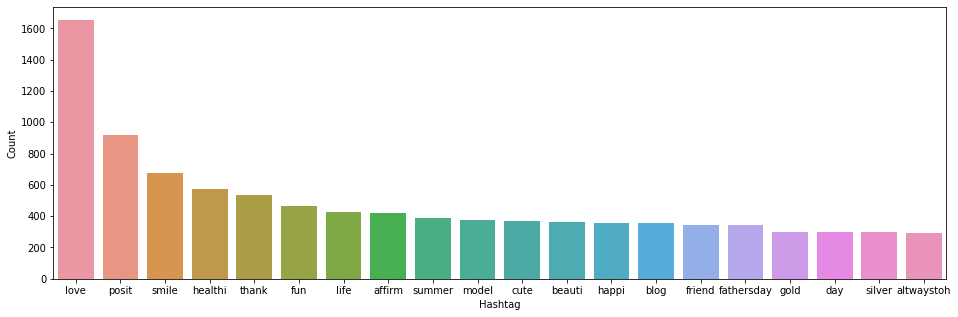

In [17]:
# Non-Racist/Sexist Tweets (Good Tweets)
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

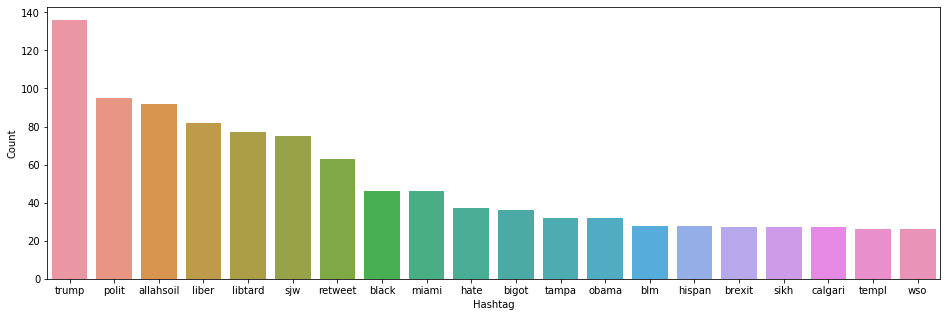

In [81]:
# Racist/Sexist Tweets (Negative Tweets:)

b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())})
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [ ]:
#Feature Extraction:

# 4. Bag-of-Words Features: 

In [18]:
# text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [19]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

# 5. TF-IDF Features:

In [ ]:
# TF = (Number of times term t appears in a document)/(Number of terms in the document)
# IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
# TF-IDF = TF*IDF

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

# 6. Word2Vec Features:

In [21]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [95]:
model_w2v.wv.most_similar(positive="dinner")

[('dess', 0.564616322517395),
 ('#cellar', 0.5459351539611816),
 ('spaghetti', 0.5425978302955627),
 ('#avocado', 0.5420920252799988),
 ('#foodcoma', 0.5314106345176697),
 ('#pasta', 0.5298057794570923),
 ('cookout', 0.5282790660858154),
 ('#biall', 0.5279954671859741),
 ('reggio', 0.5271118879318237),
 ('spinach', 0.526694655418396)]

In [96]:
model_w2v.wv.most_similar(positive="trump")

[('#delegaterevolt', 0.5420145988464355),
 ('donald', 0.5382795333862305),
 ('phoni', 0.537789523601532),
 ('unstabl', 0.531230092048645),
 ('jibe', 0.528037965297699),
 ('tomlin', 0.5279473066329956),
 ('melo', 0.5265995264053345),
 ('unfavor', 0.5261198878288269),
 ('#mainstreammedia', 0.5218638777732849),
 ('#republican', 0.520471453666687)]

In [97]:
# vector representation of any word from our corpus.:
model_w2v['food']

array([-0.65909785, -0.3659117 ,  0.01739925, -0.5939955 , -1.0545558 ,
        0.34836268,  0.5071027 ,  0.14420399,  0.32000595,  0.39853328,
        0.74394953, -0.5620035 , -0.5911666 ,  0.52774906, -0.90096027,
       -0.25339934,  0.01129048,  0.5905524 ,  0.19982243,  0.09130319,
       -0.14524142, -0.5766017 , -0.4509274 , -0.3014475 , -0.4051687 ,
       -0.49793085, -0.0746174 , -0.14288211,  0.42273876,  0.09183806,
        0.24415497, -0.3626504 , -0.29007408, -0.5875703 ,  0.15495932,
        0.27026507,  0.7499007 ,  0.8297806 ,  0.1729023 , -0.4277808 ,
       -0.20866741,  0.10499217,  0.19876939,  0.56520265,  0.12985294,
       -0.28214827,  0.08683296,  0.41265061,  0.17307474,  0.41473824,
        0.87768745,  0.5403677 , -0.6068923 ,  0.74136716,  0.21789032,
        0.16507438, -0.36913684,  0.16425265,  0.77885574, -0.02038492,
       -0.5241311 ,  0.14620236, -0.13656579,  0.7084324 ,  0.5739596 ,
        0.02794398,  0.4257002 , -0.4176242 ,  0.12871446, -0.29

In [98]:
len(model_w2v['food'])

200

In [22]:
#  function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary 
            continue
    if(count != 0):
        vec /= count
    return vec

In [23]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape  

(49159, 200)

♦ Doc2Vec Embedding: 
Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. 


In [24]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

C:\Users\DELL\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [25]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [26]:
labeled_tweets = add_label(tokenized_tweet)

In [27]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [28]:
#  let’s train a doc2vec model.:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors   
                                  size=200, # no. of desired features                         
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2. 
                                  workers=3, # no. of cores                 
                                  alpha=0.1, # learning rate           
                                  seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

C:\Users\DELL\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 1127202.00it/s]


In [29]:
# Preparing doc2vec Feature Set:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

# 07 - Modelling: Logistic Regression:

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [32]:
bow[:31962,:]

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124625 stored elements in Compressed Sparse Row format>

In [31]:
#01 Using: Bag-of-Words Features:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],random_state=42,
                                                          test_size=0.3)
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

In [ ]:
# Now let’s make predictions for the test dataset and create a submission file:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
#submission.to_csv('sub_lreg_bow.csv', index=False)

In [39]:
# 02 Using: TF-IDF Features:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5446507515473032

In [40]:
# 03: Using: Word2Vec Features:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.609865470852018

In [41]:
# 04: Using: Doc2Vec Features:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3761140819964349

# 08- SVM

In [42]:
from sklearn import svm

In [43]:
# Using Bag-of-Words Features:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5088536812674744

In [ ]:
# For submission purppose:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [44]:
# TF-IDF Features
svc = svm.SVC(kernel='linear',C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5104831358249772

In [46]:
# Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6078124999999999

In [47]:
# Doc2Vec Features:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.14091470951792337

# 09- RandomForest:

In [49]:
# Bag-of-Words Features:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)
# validation score
f1_score(yvalid, prediction)

0.5529225908372828

In [ ]:
# For Submission:
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)

In [50]:
# TF-IDF Features:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.562152133580705

In [51]:
# Word2Vec Features:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.506951871657754

In [52]:
# Doc2Vec Features:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.09192200557103064

# 10- XGBoost:

In [54]:
from xgboost import XGBClassifier

In [55]:
# Bag-of-Words Features:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5130687318489837

In [ ]:
# For Submission:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

In [56]:
# TF-IDF Features:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5185891325071497

In [57]:
# Word2Vec Features:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6619090098126672

In [58]:
# Doc2Vec Features:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.34240362811791386

# Tuning with XGBoost:

In [ ]:
#Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [60]:
import xgboost as xgb
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [61]:
#We will prepare a custom evaluation metric to calculate F1 score.

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]


General Approach for Parameter Tuning:
We will follow the steps below to tune the parameters.
1. Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.
2. tree-specific parameters: max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
3. Tune the learning rate.
4. Finally tune gamma to avoid overfitting.

# Tuning max_depth and min_child_weight:


In [63]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None

In [64]:
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )  

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7


In [66]:
# Finding best F1 Score
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


	F1 Score 0.6888078 for 79 rounds
Best params: 9, 7, F1 Score: 0.6888078


In [67]:
#Updating max_depth and min_child_weight parameters.
params['max_depth'] = 8 
params['min_child_weight'] = 6

In [68]:
# Tuning subsample and colsample:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None

In [69]:
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)

CV with subsample=0.5, colsample=0.5


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6520664 for 40 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6520664 for 40 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6520664 for 40 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6520664 for 40 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6520664 for 40 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.65149 for 39 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.65149 for 39 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.65149 for 39 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.65149 for 39 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.65149 for 39 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6698299999999999 for 59 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6698299999999999 for 59 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6698299999999999 for 59 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.6698299999999999 for 59 rounds
CV with subsample

In [70]:
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

Best params: 0.8, 0.5, F1 Score: 0.6730616


In [72]:
#Updating subsample and colsample_bytree

params['subsample'] = .8
params['colsample_bytree'] = .5

In [73]:
# Now let’s tune the learning rate.:
max_f1 = 0. 
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6804356 for 98 rounds
CV with eta=0.2
	F1 Score 0.6946668 for 126 rounds
CV with eta=0.1
	F1 Score 0.6859877999999999 for 124 rounds
CV with eta=0.05
	F1 Score 0.6851068 for 236 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.2, F1 Score: 0.6946668


In [75]:
#Let’s have a look at the final list of tuned parameters.

params = {'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 8, 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

In [76]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.059547	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.055897	Validation-f1_score:0.133165
[2]	Validation-error:0.053812	Validation-f1_score:0.133165
[3]	Validation-error:0.053082	Validation-f1_score:0.133165
[4]	Validation-error:0.053603	Validation-f1_score:0.133165
[5]	Validation-error:0.053395	Validation-f1_score:0.381635
[6]	Validation-error:0.052456	Validation-f1_score:0.475475
[7]	Validation-error:0.052456	Validation-f1_score:0.524778
[8]	Validation-error:0.05256	Validation-f1_score:0.553991
[9]	Validation-error:0.053395	Validation-f1_score:0.572698
[10]	Validation-error:0.05256	Validation-f1_score:0.590757
[11]	Validation-error:0.052143	Validation-f1_score:0.59467
[12]	Validation-error:0.052143	Validation-f1_score:0.600858
[13]	Validation-error:0.052247	Validation-f1_score:0.600147
[14]	Valid